In [36]:
from ast import literal_eval

# import data preparation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import ML libraries
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap

# import SQL dependencies
import sqlite3

In [60]:
ez = pd.read_csv(r'C:\Users\Vivek Rao\Desktop\Programming\nyt-sudoku\data-collection\easy.csv')
ez = ez.drop_duplicates()

In [1]:
import convert_to_binary

# Method 1: reduce dimensionality with numbers as arrays

In [105]:
def return_eig(x):
    x = np.array(literal_eval(x)) # .reshape((9,9))
#     x[x != 0] = 1
    return x # np.linalg.eig(x)[0][0]

In [112]:
ez.puzzle.apply(return_eig)

0      [1, 0, 6, 0, 4, 0, 9, 0, 0, 2, 0, 0, 0, 8, 0, ...
1      [0, 5, 3, 8, 0, 1, 0, 7, 0, 0, 0, 6, 3, 0, 9, ...
2      [2, 3, 1, 4, 5, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, ...
3      [0, 6, 1, 2, 4, 0, 0, 3, 0, 0, 0, 3, 7, 0, 5, ...
4      [3, 8, 6, 0, 4, 0, 0, 0, 5, 0, 0, 0, 6, 0, 0, ...
                             ...                        
186    [2, 9, 5, 6, 0, 0, 8, 0, 0, 0, 0, 7, 0, 0, 4, ...
187    [1, 0, 6, 3, 9, 0, 0, 0, 2, 0, 8, 7, 0, 1, 0, ...
188    [0, 0, 0, 7, 0, 1, 8, 0, 4, 1, 3, 7, 8, 0, 0, ...
189    [6, 2, 3, 7, 0, 0, 0, 0, 0, 0, 0, 8, 1, 0, 5, ...
190    [7, 5, 2, 0, 4, 8, 0, 0, 0, 6, 0, 0, 0, 0, 7, ...
Name: puzzle, Length: 191, dtype: object

## T-SNE

In [103]:
tsne = TSNE(n_components=2,
           perplexity=20,
           n_iter=2000,
           metric='cosine')

In [106]:
X_embedded = tsne.fit_transform(ez.puzzle.apply(eval).to_list())

C:\Users\Vivek Rao\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\Vivek Rao\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\Users\Vivek Rao\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


(-17.978466033935547, 18.896289825439453)

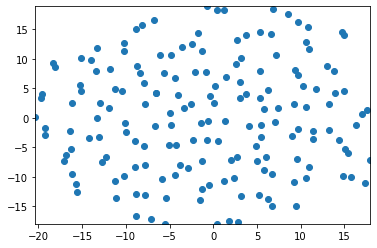

In [107]:
plt.scatter(X_embedded[:,0], X_embedded[:,1])
plt.xlim( (X_embedded.min(axis=0)[0],X_embedded.max(axis=0)[0]) )
plt.ylim( (X_embedded.min(axis=0)[1], X_embedded.max(axis=0)[1]) )

## UMAP

In [61]:
ez = ez[['puzzle_id', 'puzzle']]

In [63]:
# https://stackoverflow.com/questions/39618678/pandas-convert-columns-type-from-list-to-np-array
ez.puzzle = ez.puzzle.apply(eval).apply(lambda x: np.array(x))

In [96]:
# following steps on https://umap-learn.readthedocs.io/en/latest/basic_usage.html
reducer = umap.UMAP(n_neighbors=15,
                    min_dist=0,
                    n_components=2,
                    random_state=32)

In [97]:
embedding = reducer.fit_transform(ez.puzzle.to_list())
embedding.shape

(191, 2)

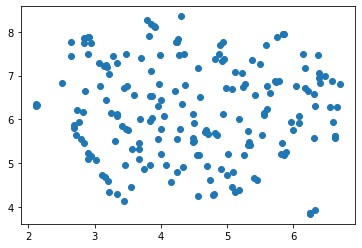

In [98]:
plt.scatter(embedding[:,0], embedding[:,1])

# Method 2: reduce dimensionality with lists expanded to columns

In [54]:
ez_nums = pd.DataFrame(ez.puzzle.apply(eval).to_list())

In [55]:
ez_filled = pd.DataFrame(ez.puzzle.apply(eval).to_list())
ez_filled = (ez_filled > 0).astype(int)

## ez_nums

### UMAP

In [156]:
# following steps on https://umap-learn.readthedocs.io/en/latest/basic_usage.html
reducer = umap.UMAP(n_neighbors=2,
                    min_dist=1,
                    n_components=2,
                    random_state=51)

In [157]:
embedding = reducer.fit_transform(ez_nums)
embedding.shape

C:\Users\Vivek Rao\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


(170, 2)

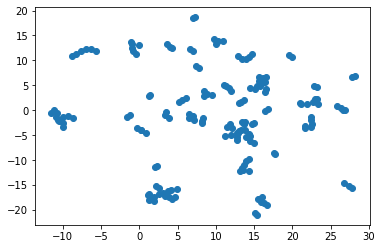

In [158]:
plt.scatter(embedding[:,0], embedding[:,1])

## ez_filled

### UMAP

In [186]:
# following steps on https://umap-learn.readthedocs.io/en/latest/basic_usage.html
reducer = umap.UMAP(n_neighbors=2,
                    min_dist=0.85,
                    n_components=2,
                    random_state=51)

In [187]:
embedding = reducer.fit_transform(ez_filled)
embedding.shape

(170, 2)

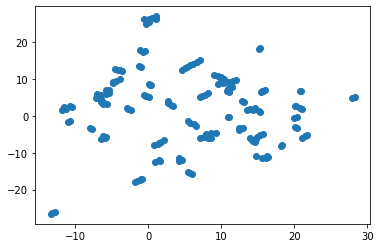

In [188]:
plt.scatter(embedding[:,0], embedding[:,1])

### T-SNE

In [138]:
tsne = TSNE(n_components=2,
           perplexity=10,
           early_exaggeration=55,
           n_iter=1750,
           metric='cosine')

In [139]:
X_embedded = tsne.fit_transform(ez_filled)

C:\Users\Vivek Rao\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\Vivek Rao\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\Users\Vivek Rao\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


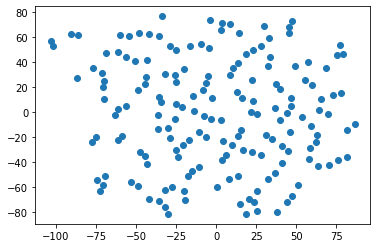

In [140]:
plt.scatter(X_embedded[:,0], X_embedded[:,1])

## PCA

In [124]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
pca= PCA(n_components=2,
        random_state=15,
        svd_solver='full')

In [125]:
pca_embedded = pca.fit_transform(ez_filled)

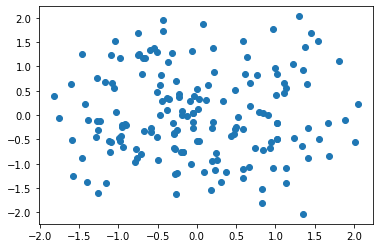

In [126]:
plt.scatter(pca_embedded[:,0], pca_embedded[:,1])

# Method 3: dimension reductionality on performance

In [4]:
con = sqlite3.connect("../data-collection/nyt-sudoku.db")
cur = con.cursor()

In [8]:
doks_perf = pd.read_sql("SELECT * from doks_performance;",
           con)

In [11]:
times_col = pd.DataFrame(doks_perf.times.apply(eval).to_list())
times_col = times_col.fillna(0)

## UMAP on times

In [15]:
# following steps on https://umap-learn.readthedocs.io/en/latest/basic_usage.html
reducer = umap.UMAP(n_neighbors=2,
                    min_dist=0.85,
                    n_components=2,
                    random_state=51)

In [17]:
embedding = reducer.fit_transform(times_col)
embedding.shape

(13, 2)

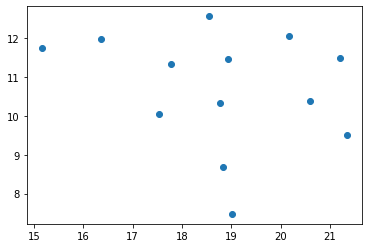

In [18]:
plt.scatter(embedding[:,0], embedding[:,1])

# Method 4: use linear algebra

Inspired by the links over on <a href="https://www.pinecone.io/learn/">pinecone.io</a>

In [47]:
np.inner(convert_to_binary(ez.puzzle[0]),
         convert_to_binary(ez.puzzle[1]))

13

In [52]:
from itertools import combinations

In [63]:
simmat = ez.puzzle.apply(convert_to_binary).apply(
    lambda x: ez.puzzle.apply(convert_to_binary).apply(
        lambda y: np.inner(x, y)))

In [68]:
pd.DataFrame(np.triu(simmat)).to_csv('similarity_matrix.csv')

In [79]:
# highest score was between 92 and 165
# aka between '2022-02-16' and '2023-01-17'
ez.date[ez.index[165]]

'2023-01-17'

In [81]:
# highest score was between 37 and 53
# aka between '2021-11-12' and '2021-12-08'
ez.date[ez.index[53]]

'2021-12-08'